In [10]:
# Tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
const_1 = tf.constant(value=[5.0],dtype=tf.float32,shape=(1,),name='const_1')
print(const_1)

Tensor("const_1:0", shape=(1,), dtype=float32)


In [12]:
var_1 = tf.Variable(initial_value=[1.0], 
        trainable=True, 
        caching_device=None,
        validate_shape=True, 
        name='var_1',                
        variable_def=None, 
        dtype=tf.float32,
        import_scope=None,
        shape=(1,))

print(var_1)

<tf.Variable 'var_1:0' shape=(1,) dtype=float32_ref>


In [13]:
# placeholder ==> for giving i/p
placeholder_1 = tf.placeholder(dtype= tf.float32 ,shape=(1,),name='placeholder_1')
print(placeholder_1)

Tensor("placeholder_1:0", shape=(1,), dtype=float32)


In [15]:
session = tf.Session()

In [16]:
print(session.run(const_1))

[5.]


In [19]:
init = tf.global_variables_initializer()
session.run(init)
print(session.run(var_1))

[1.]


In [20]:
print(session.run([const_1,var_1]))

[array([5.], dtype=float32), array([1.], dtype=float32)]


In [21]:
# way to pass in any value
print(session.run(placeholder_1, feed_dict={placeholder_1:[10.0]}))

[10.]


In [22]:
# Linear Regression
# creating a dataset
import matplotlib.pyplot as plt

x_train = [0.0, 1.0, 2.0, 3.0] #i/p
y_train = [1.0, 2.0, 3.0, 4.0] #correct values



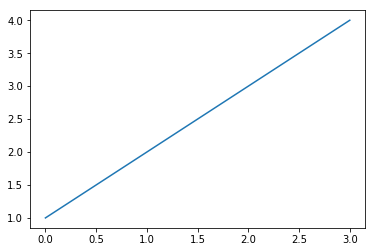

In [23]:
plt.plot(x_train,y_train)
plt.show()

In [24]:
# y = mx + b
m = tf.Variable(initial_value=[0.5], dtype=tf.float32)
b = tf.Variable(initial_value=[0.5], dtype=tf.float32)

In [25]:
x_input = tf.placeholder(dtype=tf.float32)
y_input = tf.placeholder(dtype=tf.float32)

In [26]:
y_output = tf.add(tf.multiply(m,x_input),b)

In [27]:
loss = tf.reduce_sum(input_tensor=tf.square(x = y_output - y_input))
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.01)
trainstep = optimiser.minimize(loss=loss)

In [31]:
session.run(tf.global_variables_initializer())
print(session.run(loss, feed_dict={x_input:x_train, y_input:y_train}))
for _ in range(1000):
    session.run(trainstep, feed_dict={x_input:x_train, y_input:y_train})
print(session.run([loss, m, b], feed_dict={x_input:x_train, y_input:y_train}))

7.5
[4.465761e-12, array([1.000001], dtype=float32), array([0.9999983], dtype=float32)]


In [32]:
# testing
model_output = session.run(y_output, feed_dict={x_input:x_train})

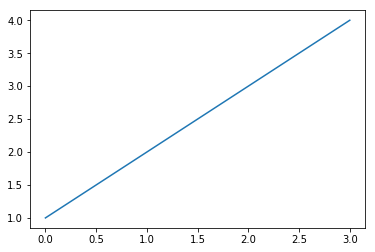

In [33]:
plt.plot(x_train, model_output)
plt.plot(x_train, y_train)
plt.show()